In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

%matplotlib inline

In [2]:
sns.set(
    style="whitegrid",
    font_scale=1.4,
    rc={
        "lines.linewidth": 2,
        #             "axes.facecolor": ".9",
        'figure.figsize': (12, 6)
    })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [29]:
from utils.data_gen import compute_bayes_risk_binary, compute_bayes_risk_binary_label_shift,\
    generate_2d_example,LDA_predictor

from utils.conformal import knn_conformal_measure,martingale_simple_bets,simple_mixture,label_conformal_transducer

# Data

In [9]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
target_prob_class_1 = 0.8

eps_tol = 0.05

In [10]:
mu_1 = np.array([1, 0])
mu_0 = np.array([-1, 0])
prob_class_1 = 0.25
prob_class_0 = 1 - prob_class_1
cov = np.eye(2)

In [11]:
clf = LDA_predictor()

clf.mean_class_0 = mu_0
clf.mean_class_1 = mu_1
clf.class_0_prior = prob_class_0
clf.class_1_prior = prob_class_1

# class conf score

In [237]:
clf = LDA_predictor()

clf.mean_class_0 = mu_0
clf.mean_class_1 = mu_1
clf.class_0_prior = prob_class_0
clf.class_1_prior = prob_class_1
clf.predict_both_classes = True

In [413]:
number_of_sims=50

In [414]:
glob_mart_raw = list()
n_to_use = 1200

In [415]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.1, mu_0, mu_1, 100)

    X_target_new, y_target_new = generate_2d_example(0.15, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.2, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    X_target_new, y_target_new = generate_2d_example(0.25, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.4, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.35, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.4, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.45, mu_0, mu_1, 650)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.6, mu_0, mu_1, 150)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.8, mu_0, mu_1, 250)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

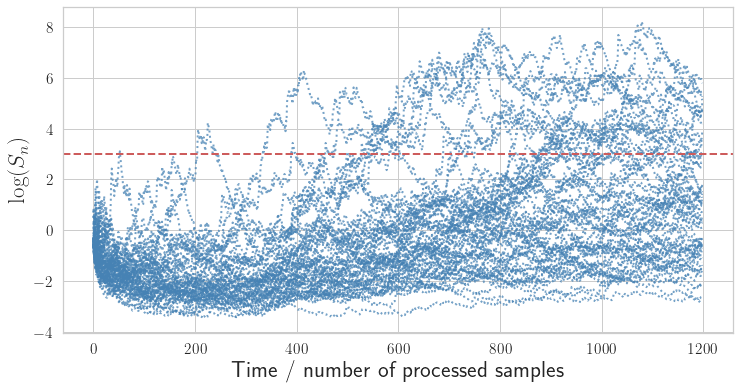

In [416]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
plt.savefig('img/mart_drift_benign.pdf', bbox_inches='tight')

In [417]:
glob_mart_raw = list()
n_to_use = 1200

In [418]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.5, mu_0, mu_1, 100)

    X_target_new, y_target_new = generate_2d_example(0.55, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    X_target_new, y_target_new = generate_2d_example(0.6, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.65, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.7, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.75, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.8, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.85, mu_0, mu_1, 650)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.6, mu_0, mu_1, 150)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.8, mu_0, mu_1, 250)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

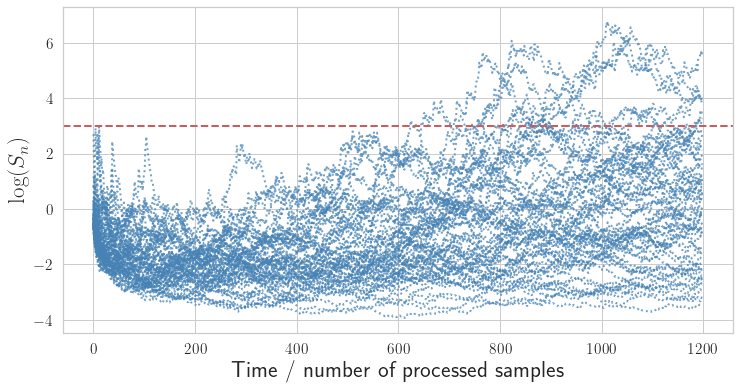

In [419]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
plt.savefig('img/mart_drift_harmful.pdf', bbox_inches='tight')

In [456]:
glob_mart_raw = list()
n_to_use = 1200

In [457]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.25, mu_0, mu_1, 100)

    X_target_new, y_target_new = generate_2d_example(0.75, mu_0, mu_1, 1100)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])


    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

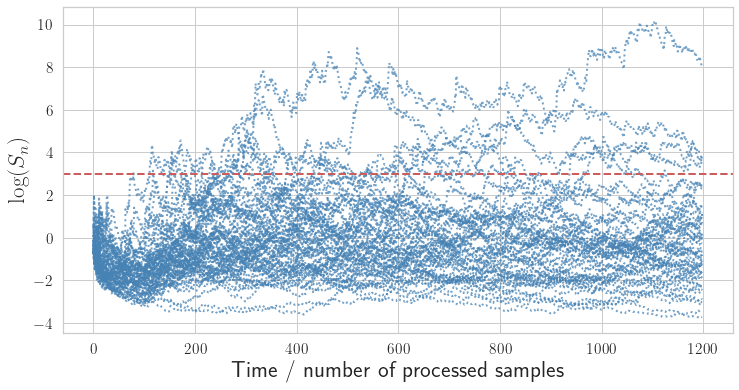

In [468]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
plt.savefig('img/mart_shift_harmful.pdf', bbox_inches='tight')

In [453]:
glob_mart_raw = list()
n_to_use = 1200

In [454]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.25, mu_0, mu_1, 1200)

#     X_target_new, y_target_new = generate_2d_example(0.75, mu_0, mu_1, 1200)

#     X_target = np.vstack([X_target, X_target_new])
#     y_target = np.hstack([y_target, y_target_new])


    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

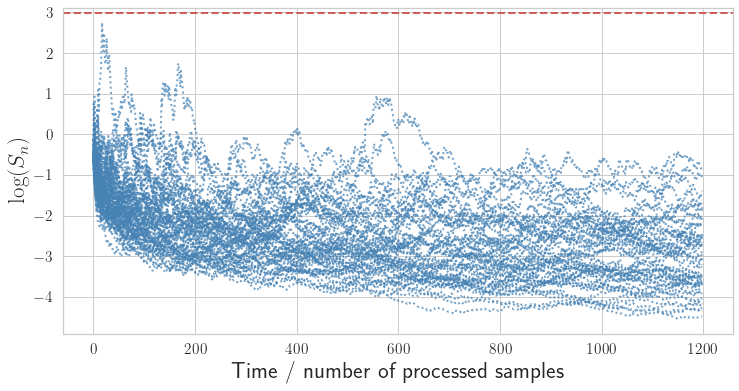

In [455]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
plt.savefig('img/mart_shift_harmful_iid.pdf', bbox_inches='tight')

In [423]:
glob_mart_raw = list()
n_to_use = 1200

In [424]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.1, mu_0, mu_1, 150)

    X_target_new, y_target_new = generate_2d_example(0.3, mu_0, mu_1, 150)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    X_target_new, y_target_new = generate_2d_example(0.5, mu_0, mu_1, 150)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.7, mu_0, mu_1, 150)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.9, mu_0, mu_1, 600)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
#     X_target_new, y_target_new = generate_2d_example(0.7, mu_0, mu_1, 75)

#     X_target = np.vstack([X_target, X_target_new])
#     y_target = np.hstack([y_target, y_target_new])
    
#     X_target_new, y_target_new = generate_2d_example(0.75, mu_0, mu_1, 550)

#     X_target = np.vstack([X_target, X_target_new])
#     y_target = np.hstack([y_target, y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.6, mu_0, mu_1, 150)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.8, mu_0, mu_1, 250)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

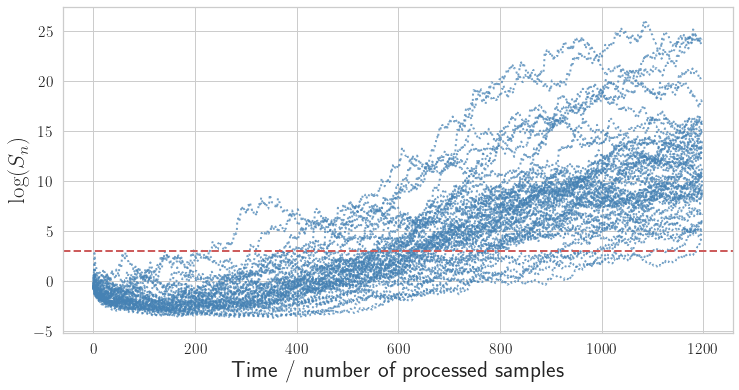

In [425]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)

# plt.ylim([-3,50])
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
plt.savefig('img/mart_drift_sharp.pdf', bbox_inches='tight')

In [426]:
glob_mart_raw = list()
n_to_use = 1200

In [427]:
for cur_sim in range(number_of_sims):
    glob_mart_raw += [[]]

    X_target, y_target = generate_2d_example(0.45, mu_0, mu_1, 100)

    X_target_new, y_target_new = generate_2d_example(0.4, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.35, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    X_target_new, y_target_new = generate_2d_example(0.3, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.25, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.2, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    
    X_target_new, y_target_new = generate_2d_example(0.15, mu_0, mu_1, 75)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])
    
    X_target_new, y_target_new = generate_2d_example(0.1, mu_0, mu_1, 650)

    X_target = np.vstack([X_target, X_target_new])
    y_target = np.hstack([y_target, y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.6, mu_0, mu_1, 150)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    #     X_target_new, y_target_new = generate_2d_example(
    #             0.8, mu_0, mu_1, 250)

    #     X_target = np.vstack([X_target,X_target_new])
    #     y_target = np.hstack([y_target,y_target_new])

    true_class_preds = np.array([
        cur_pair[y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    second_class_preds = np.array([
        cur_pair[1 - y_target[cur_ind]]
        for cur_ind, cur_pair in enumerate(clf.predict_proba(X_target))
    ])

    num_of_preds = len(true_class_preds)
    
    
    raw_scores = second_class_preds * (
        second_class_preds <= true_class_preds) + true_class_preds * (
            true_class_preds <= true_class_preds)

    p_vals_raw = list()

    for i in range(1, n_to_use):
        p_vals_raw += [label_conformal_transducer(raw_scores[:i])]

    mart_raw = list()

    for i in range(1, n_to_use):
        mart_raw += [simple_mixture(p_vals_raw[:i])]

    glob_mart_raw[cur_sim] += mart_raw

Text(0.5, 0, 'Time / number of processed samples')

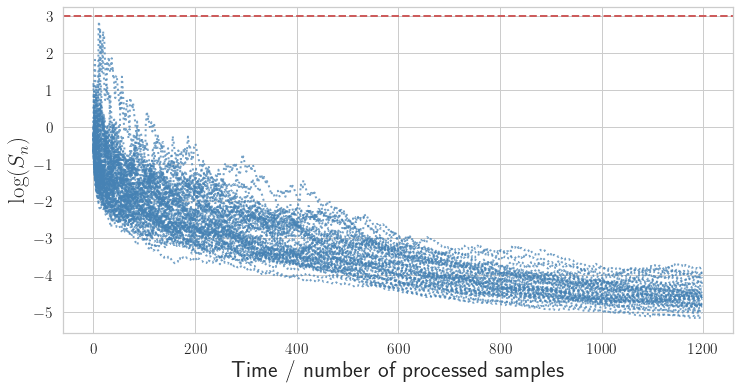

In [428]:
for cur_mart in glob_mart_raw:
    plt.plot(cur_mart, c = 'steelblue', alpha=0.75, linestyle='dotted')

plt.axhline(y=np.log(1/0.05),linestyle='dashed', c = 'indianred')
    
plt.ylabel(r'$\log(S_n)$', fontsize=23)
plt.xlabel('Time / number of processed samples', fontsize=23)

# plt.ylim([-3,50])
    
# plt.legend(loc=4, amarkerscale=1.5, prop={'size': 20})
# plt.savefig('img/mart_drift_sharp.pdf', bbox_inches='tight')